In [1]:
# We start by importing the necessary libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.set_option('max_columns',None)
pd.set_option('max_colwidth',50)

### 1. Loading and understanding the data set

In [4]:
df1_leads = pd.read_csv('Leads.csv')
df1_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df1_leads.shape

(9240, 37)

In [6]:
# Understanding the numeric columns of the data set
df1_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Understanding the data types of the columns 
df1_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### There are categorical columns present in the data frame, so we need to change them

In [8]:
df1_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
type(df1_leads.columns)

pandas.core.indexes.base.Index

In [10]:
for c in df1_leads.columns:
    print(df1_leads.value_counts(c))
    print('#'*50,end='\n')
    

Prospect ID
fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Length: 9240, dtype: int64
##################################################
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Length: 9240, dtype: int64
##################################################
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
dtype: int64
#########################################

In [11]:
# Checking for the Null values in the Data Frame in Descinding order
df1_leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [12]:
# Looking at % null values in each column
round(((df1_leads.isnull().sum()/len(df1_leads)).sort_values(ascending=False))*100,2)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [13]:
#Checking unique values in each columns
df1_leads.nunique().sort_values(ascending=True)

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

### 2. Cleaning of the Data Frame

#### 17 columns out of the total 37 columns have null values present, so we will first have to deal with the null values.

In [14]:
# Checking the null values again
round(((df1_leads.isnull().sum()/len(df1_leads)).sort_values(ascending=False))*100,2)


Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [15]:
# We can drop the columns with more than 40% missing values
for c in df1_leads.columns:
    if round((df1_leads[c].isnull().sum()/len(df1_leads))*100,2)>35:
        print(c)

Tags
Lead Quality
Asymmetrique Activity Index
Asymmetrique Profile Index
Asymmetrique Activity Score
Asymmetrique Profile Score


In [16]:
# Dropping the above mentioned columns as there are more than 40% missing values in them
df1_leads = df1_leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [17]:
round(((df1_leads.isnull().sum()/len(df1_leads)).sort_values(ascending=False))*100,2)

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

### We are now left with 30 columns after removing the mentioned above columns

In [18]:
df1_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [19]:
# Checking what all values are in the left columns with null values
df1_leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
df1_leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [21]:
df1_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
df1_leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
df1_leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Sweden                     3
Netherlands                2
Philippines                2
Italy                      2
Bangladesh                 2
Asia/Pacific Region        2
Ghana                      2
Uganda                     2
Belgium                    2
China                      2
Liberia                    1
Switzerland                1
Denmark                    1
Sri Lanka                  1
Russia                     1
Indonesia                  1
Vietnam       

In [24]:
df1_leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
# As mentioned in the description there is "Select" in the columns
# This can be replaced with Nan as the customer did not do any selection here
df1_leads = df1_leads.replace('Select',np.nan)

In [26]:
# Checking for null values again 
round(((df1_leads.isnull().sum()/len(df1_leads)).sort_values(ascending=False))*100,2)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

In [27]:
df1_leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
df1_leads.shape

(9240, 30)

In [29]:
# Since Majority Values in the City column are of Mumbai we can replace the null values with Mumbai
df1_leads['City'] = df1_leads['City'].replace(np.nan,'Mumbai')

In [30]:
df1_leads.isnull().sum().sort_values(ascending=False)

Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Last Notable Activity                               0
A free copy of Mastering The Interview              0
Search                                              0
Magazine                    

In [31]:
df1_leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [32]:
#Since Specialization seems to be an important column at this point, will replace the missing values with nan
df1_leads['Specialization'] = df1_leads['Specialization'].replace(np.nan,'Others')

In [33]:
df1_leads['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
df1_leads.isnull().sum().sort_values(ascending=False)

Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Specialization                                      0
Last Notable Activity                               0
A free copy of Mastering The Interview              0
Search                                              0
Magazine                    

In [35]:
# Checking for Tags
df1_leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [36]:
df1_leads['Tags'] = df1_leads['Tags'].replace(np.nan,'Will revert after reading the email')

In [37]:
df1_leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
A free copy of Mastering The Interview              0
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Specialization                                      0
Last Notable Activity                               0
Search                                              0
Magazine                                            0
Newspaper Article           

In [38]:
df1_leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

#### Nearly all the answers in this column are same, so this is skewed or we can say does not affect the analysis, so we can drop the colum

In [39]:
df1_leads = df1_leads.drop('What matters most to you in choosing a course',axis=1)

In [40]:
df1_leads.isnull().sum().sort_values(ascending=False)

What is your current occupation             2690
Country                                     2461
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Last Notable Activity                          0
Lead Number                                    0
Lead Origin                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
Total Time Spent on Website                    0
Specialization                                 0
Search                                         0
A free copy of Mastering The Interview         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [41]:
df1_leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [42]:
df1_leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [43]:
# We can impute the missing values with unemployed
df1_leads['What is your current occupation'] = df1_leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [44]:
df1_leads.isnull().sum().sort_values(ascending=False)

Country                                     2461
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Last Notable Activity                          0
What is your current occupation                0
Lead Number                                    0
Lead Origin                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
Total Time Spent on Website                    0
Specialization                                 0
Search                                         0
A free copy of Mastering The Interview         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [45]:
df1_leads['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
South Africa             0.059006
Nigeria                  0.059006
Sweden                   0.044254
Netherlands              0.029503
Philippines              0.029503
Italy                    0.029503
Bangladesh               0.029503
Asia/Pacific Region      0.029503
Ghana                    0.029503
Uganda                   0.029503
Belgium                  0.029503
China                    0.029503
Liberia                  0.014751
Switzerland   

In [46]:
df1_leads['Country'] = df1_leads['Country'].replace(np.nan,'India')

In [47]:
df1_leads['Country'].value_counts(normalize=True)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
South Africa             0.043290
Nigeria                  0.043290
Sweden                   0.032468
Netherlands              0.021645
Philippines              0.021645
Italy                    0.021645
Bangladesh               0.021645
Asia/Pacific Region      0.021645
Ghana                    0.021645
Uganda                   0.021645
Belgium                  0.021645
China                    0.021645
Liberia                  0.010823
Switzerland   

In [48]:
# Since the Country Column is also highly skewed, we can drop this column also
df1_leads = df1_leads.drop('Country',axis=1)

In [49]:
#Checking for null values again
df1_leads.isnull().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Last Notable Activity                         0
A free copy of Mastering The Interview        0
Lead Number                                   0
Lead Origin                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
Total Time Spent on Website                   0
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                 

#### There are some columns in the data set which have only one value, so we can also drop them as they will not affect our outcome


In [50]:
df1_leads.nunique().sort_values(ascending=False)

Prospect ID                                 9240
Lead Number                                 9240
Total Time Spent on Website                 1731
Page Views Per Visit                         114
TotalVisits                                   41
Tags                                          26
Lead Source                                   21
Specialization                                19
Last Activity                                 17
Last Notable Activity                         16
City                                           6
What is your current occupation                6
Lead Origin                                    5
Newspaper                                      2
X Education Forums                             2
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
Search                                         2
Through Recommendations                        2
Digital Advertisemen

In [51]:
### We can drop the columns with single unique values in the column
df1_leads = df1_leads.drop(['Receive More Updates About Our Courses','Get updates on DM Content','Magazine','I agree to pay the amount through cheque','Update me on Supply Chain Content'],axis=1)

In [52]:
df1_leads.nunique().sort_values(ascending=False)

Prospect ID                               9240
Lead Number                               9240
Total Time Spent on Website               1731
Page Views Per Visit                       114
TotalVisits                                 41
Tags                                        26
Lead Source                                 21
Specialization                              19
Last Activity                               17
Last Notable Activity                       16
What is your current occupation              6
City                                         6
Lead Origin                                  5
Newspaper Article                            2
Search                                       2
A free copy of Mastering The Interview       2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Converted                                    2
Do Not Call                                  2
Do Not Email 

In [53]:
# Checking for Null Values Again
df1_leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               137
Page Views Per Visit                      137
Last Activity                             103
Lead Source                                36
Last Notable Activity                       0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
Total Time Spent on Website                 0
Specialization                              0
A free copy of Mastering The Interview      0
What is your current occupation             0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Tags                                        0
City                              

In [54]:
round(((df1_leads.isnull().sum()/len(df1_leads)).sort_values(ascending=False))*100,2)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Last Notable Activity                     0.00
Lead Number                               0.00
Lead Origin                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Specialization                            0.00
A free copy of Mastering The Interview    0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City         

In [55]:
#Since there are only approx 1.5% null values now, we can drop these values
df1_leads.dropna(inplace=True)

In [56]:
round(((df1_leads.isnull().sum()/len(df1_leads)).sort_values(ascending=False))*100,2)

Last Notable Activity                     0.0
Last Activity                             0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                              

In [57]:
df1_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Do Not Call                             9074 non-null   object 
 6   Converted                               9074 non-null   int64  
 7   TotalVisits                             9074 non-null   float64
 8   Total Time Spent on Website             9074 non-null   int64  
 9   Page Views Per Visit                    9074 non-null   float64
 10  Last Activity                           9074 non-null   obje

In [58]:
df1_leads['Prospect ID'].value_counts(normalize=True)*100

2858b878-974d-401c-802a-e6615a451fb7    0.01102
fcd8a225-75ae-4d69-973c-1f5594736501    0.01102
66dbe8b8-ffc9-4eb1-9d49-79c8dc6eb8f8    0.01102
ffa4e5ad-06f9-4719-88d9-b75b0341e6cf    0.01102
e16f1abc-7ce6-4bb7-ae46-4f9d7a71c5f1    0.01102
                                         ...   
c6858591-1329-48e3-9e27-3d6407a5546d    0.01102
498baa59-4e52-11e6-96be-22000aa8e760    0.01102
3d52718b-a859-457a-90b1-ff58eef36e8c    0.01102
22e5f4a3-c8ad-4e06-80c9-ba8f540bee6b    0.01102
72ce6863-35c0-408b-b6b5-02cee868dcff    0.01102
Name: Prospect ID, Length: 9074, dtype: float64

In [59]:
df1_leads['Lead Number'].value_counts(normalize=True)*100

608255    0.01102
656682    0.01102
634167    0.01102
625971    0.01102
646449    0.01102
           ...   
582137    0.01102
643807    0.01102
600800    0.01102
598753    0.01102
655360    0.01102
Name: Lead Number, Length: 9074, dtype: float64

### The above 2 columns have all unique values so they are not of used

In [60]:
df1_leads = df1_leads.drop(['Prospect ID','Lead Number'],axis=1)

In [61]:
df1_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

In [62]:
df1_leads['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [63]:
df1_leads['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [64]:
df1_leads['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [65]:
df1_leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [66]:
df1_leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [67]:
df1_leads['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [68]:
df1_leads['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

### As we can see that the above columns have majorly 'No' highlighted, we can remove these columns as columns with only one Vrariable name are of no significance


In [69]:
df1_leads = df1_leads.drop(['Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Search','Do Not Call'],axis=1)

In [70]:
df1_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [71]:
df1_leads.describe(percentiles=(0,0.25,0.50,0.75,0.90,0.99))

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
99%,1.000000,17.000000,1839.000000,9.000000


In [72]:
df1_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


#### We can convert some binary variables to 0/1

In [73]:
df1_leads["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [74]:
df1_leads["A free copy of Mastering The Interview"].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [75]:
# Replacing Yes with 1 and No with 0 in both the above columns
df1_leads["Do Not Email"].replace("No",0,inplace = True)

In [76]:
df1_leads["Do Not Email"].replace("Yes",1,inplace = True)

In [77]:
df1_leads["A free copy of Mastering The Interview"].replace("No",0,inplace = True)


In [78]:
df1_leads["A free copy of Mastering The Interview"].replace("Yes",1,inplace = True)

In [79]:
df1_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


## 3. EDA

### Outlier Analysis

In [80]:
df1_leads.describe(percentiles=(0,0.25,0.50,0.75,0.90,0.99))

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.378554,3.456028,482.887481,2.370151,0.318272
std,0.269608,0.485053,4.858802,545.256560,2.160871,0.465831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,922.750000,3.200000,1.000000
90%,0.000000,1.000000,7.000000,1373.000000,5.000000,1.000000
99%,1.000000,1.000000,17.000000,1839.000000,9.000000,1.000000


#### We can clearly see in the above that the 'Total Visits' and 'Page Views Per Visit' are having outliers as the values from 99 to Max are incereasing suddenly

### We will be removing the outliers from these 2 columns

In [81]:
# Deleting values beyond 99% for Total Visits

total_visits = df1_leads['TotalVisits'].quantile(0.99)
df1_leads = df1_leads[df1_leads["TotalVisits"] < total_visits]
df1_leads["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8975.000000
mean        3.192535
std         2.934948
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [82]:
# Deleting values beyond 99% for Total Visits

page_visits = df1_leads['Page Views Per Visit'].quantile(0.99)
df1_leads = df1_leads[df1_leads["Page Views Per Visit"] < page_visits]
df1_leads["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8863.000000
mean        2.236941
std         1.835885
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [83]:
df1_leads.describe(percentiles=(0,0.25,0.50,0.75,0.90,0.99))

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000
mean,0.077175,0.378089,3.098387,478.122193,2.236941,0.311407
std,0.266884,0.484937,2.821961,544.532372,1.835885,0.463095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,240.000000,2.000000,0.000000
75%,0.000000,1.000000,4.000000,913.000000,3.000000,1.000000
90%,0.000000,1.000000,7.000000,1371.000000,5.000000,1.000000
99%,1.000000,1.000000,13.000000,1837.760000,7.000000,1.000000


In [84]:
# Finding the percentage of data retained

percent_data = round(100*(len(df1_leads)/9240),2)
print(percent_data)

95.92


#### We have retained approximately 96% of the data and this clean data is now ready for further steps

## Univariate Analysis

In [85]:
df1_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8863 non-null   object 
 1   Lead Source                             8863 non-null   object 
 2   Do Not Email                            8863 non-null   int64  
 3   Converted                               8863 non-null   int64  
 4   TotalVisits                             8863 non-null   float64
 5   Total Time Spent on Website             8863 non-null   int64  
 6   Page Views Per Visit                    8863 non-null   float64
 7   Last Activity                           8863 non-null   object 
 8   Specialization                          8863 non-null   object 
 9   What is your current occupation         8863 non-null   object 
 10  Tags                                    8863 non-null   obje

### 1.Categorical Variables

In [86]:
cat_cols = df1_leads.select_dtypes(include='object').columns
print(cat_cols)

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')


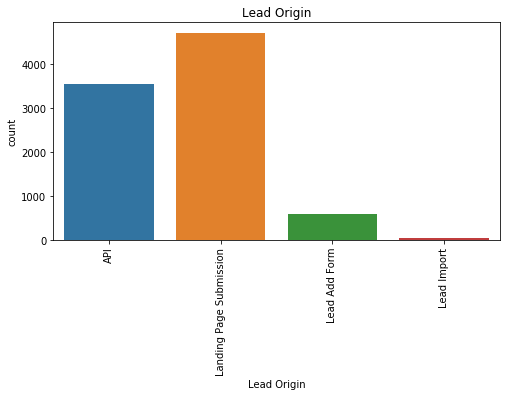

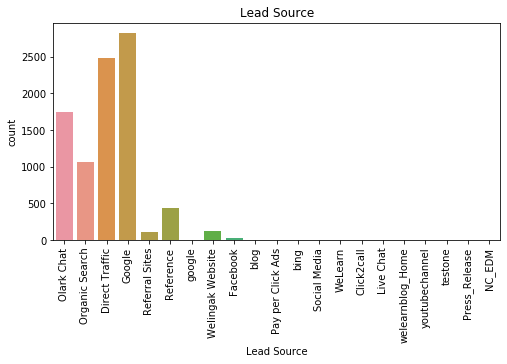

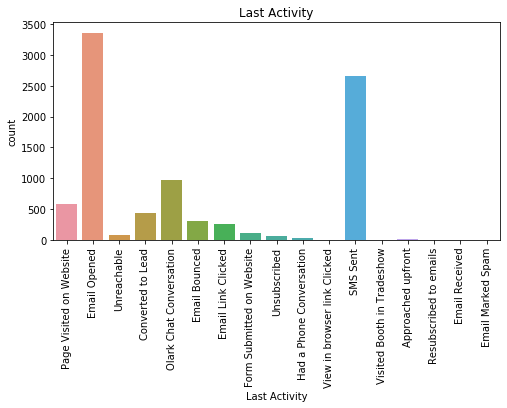

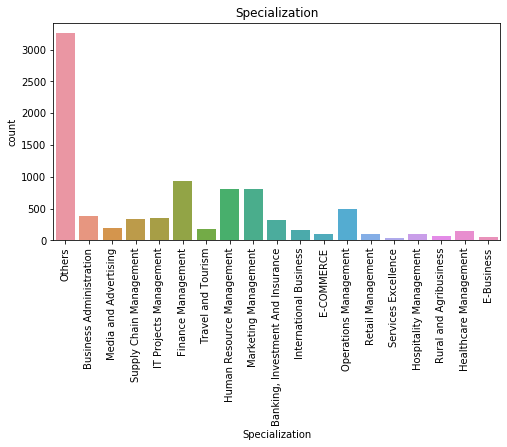

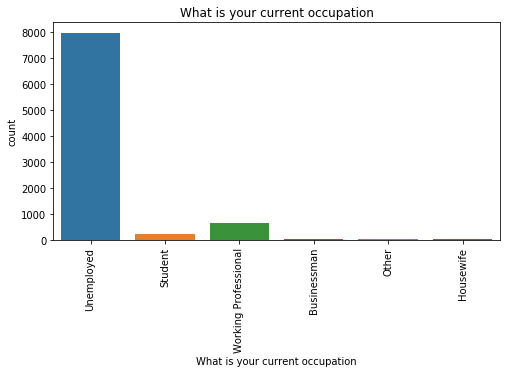

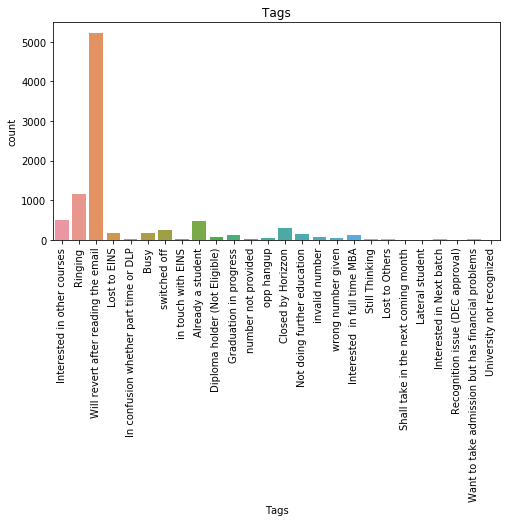

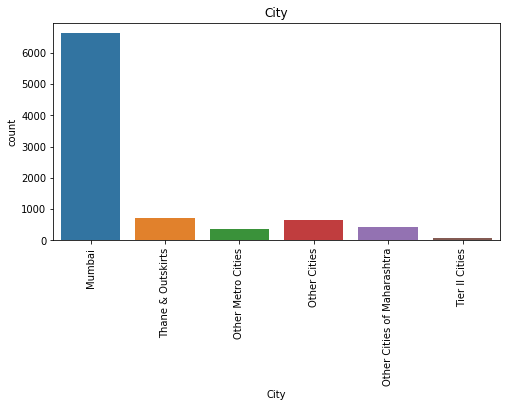

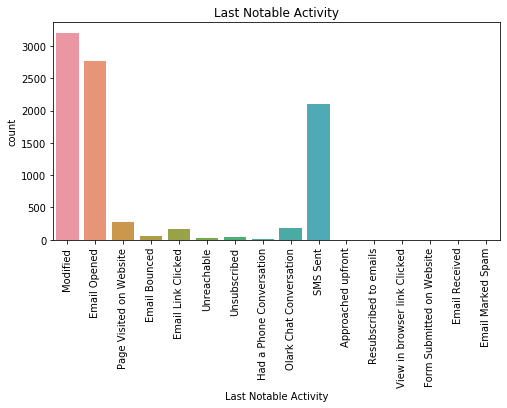

In [87]:
for c in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df1_leads[c])
    plt.xticks(rotation = 90)
    plt.title(c)
    plt.xlabel(c)
    plt.show()

### 2. Numerica Variables

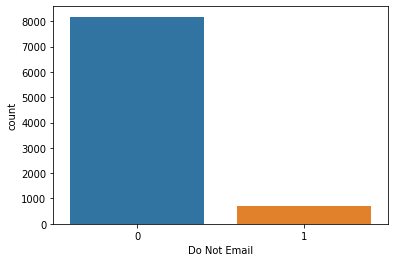

In [88]:
sns.countplot(x=df1_leads['Do Not Email'])
plt.show()

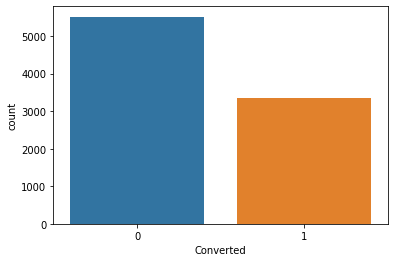

In [89]:
sns.countplot(x=df1_leads['Converted'])
plt.show()

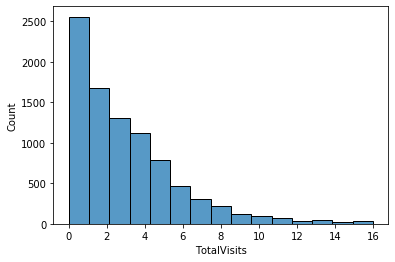

In [90]:
sns.histplot(data=df1_leads,x='TotalVisits', bins=15)
plt.show()

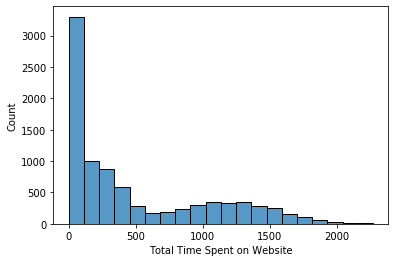

In [91]:
sns.histplot(data=df1_leads,x='Total Time Spent on Website', bins=20)
plt.show()

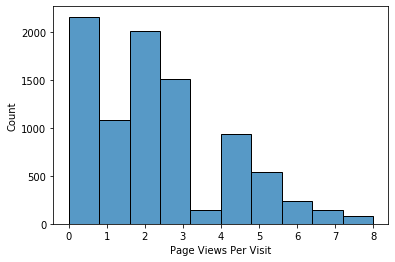

In [92]:
sns.histplot(data=df1_leads,x='Page Views Per Visit', bins=10)
plt.show()

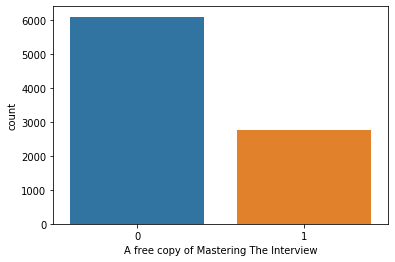

In [93]:

sns.countplot(x=df1_leads['A free copy of Mastering The Interview'])
plt.show()

### Bivariate Analysis
#### Analysing the columns wrt to the target variable 'Converted'

### 1. Categorical Variable

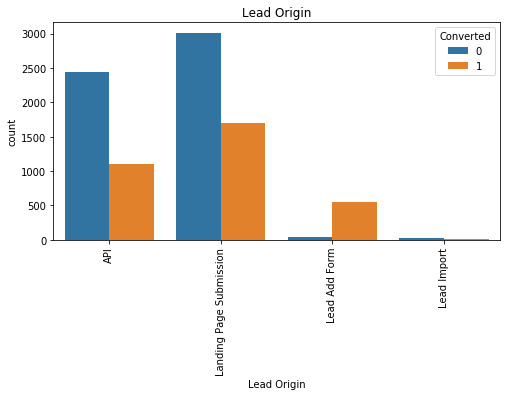

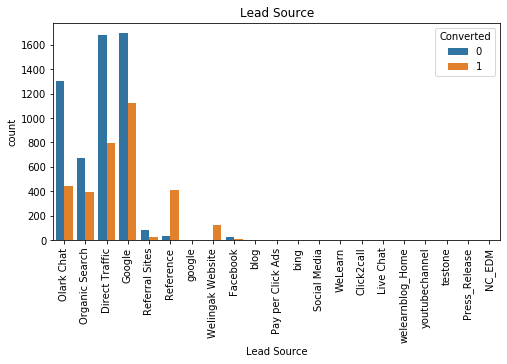

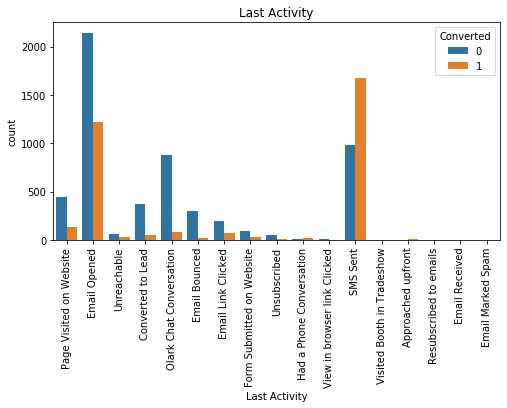

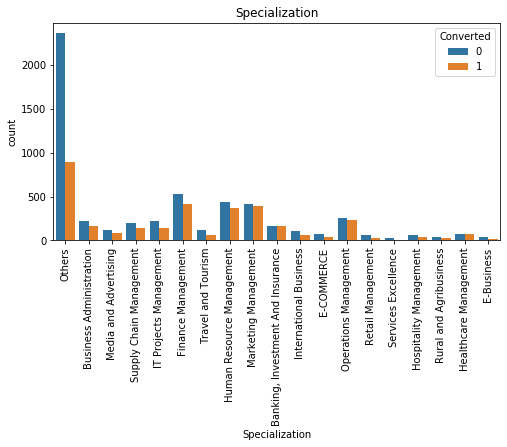

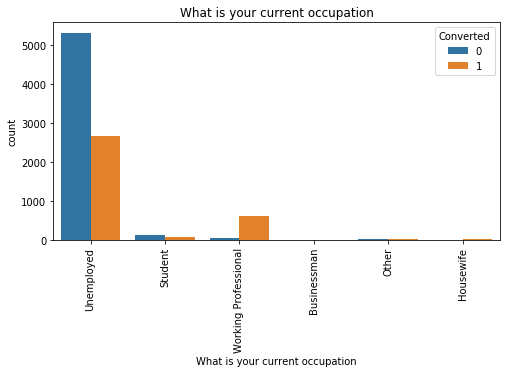

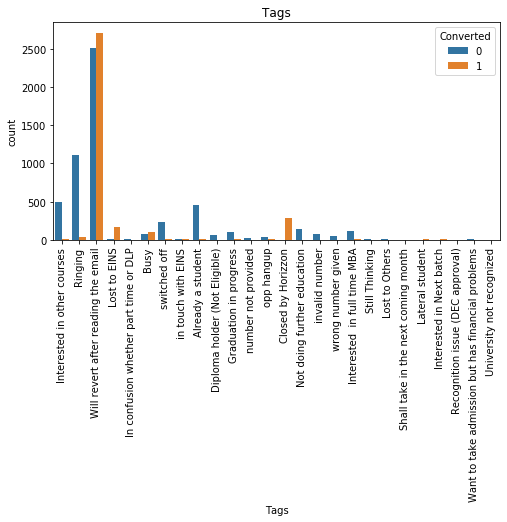

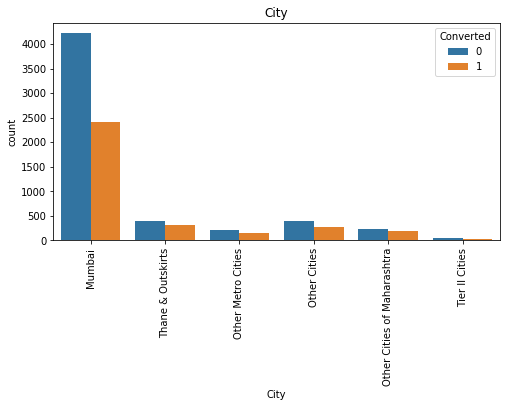

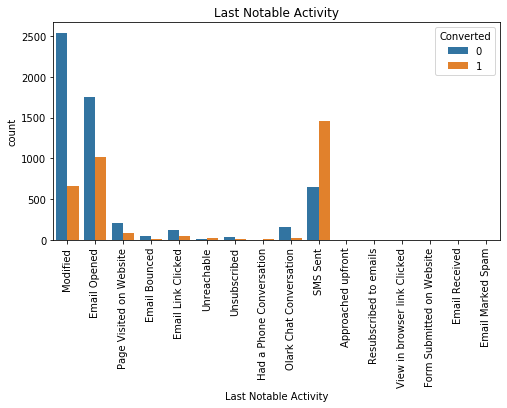

In [94]:
    
for c in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df1_leads[c], hue=df1_leads.Converted)
    plt.xticks(rotation = 90)
    plt.title(c)
    plt.xlabel(c)
    plt.show()

### 2. Numerical Variable

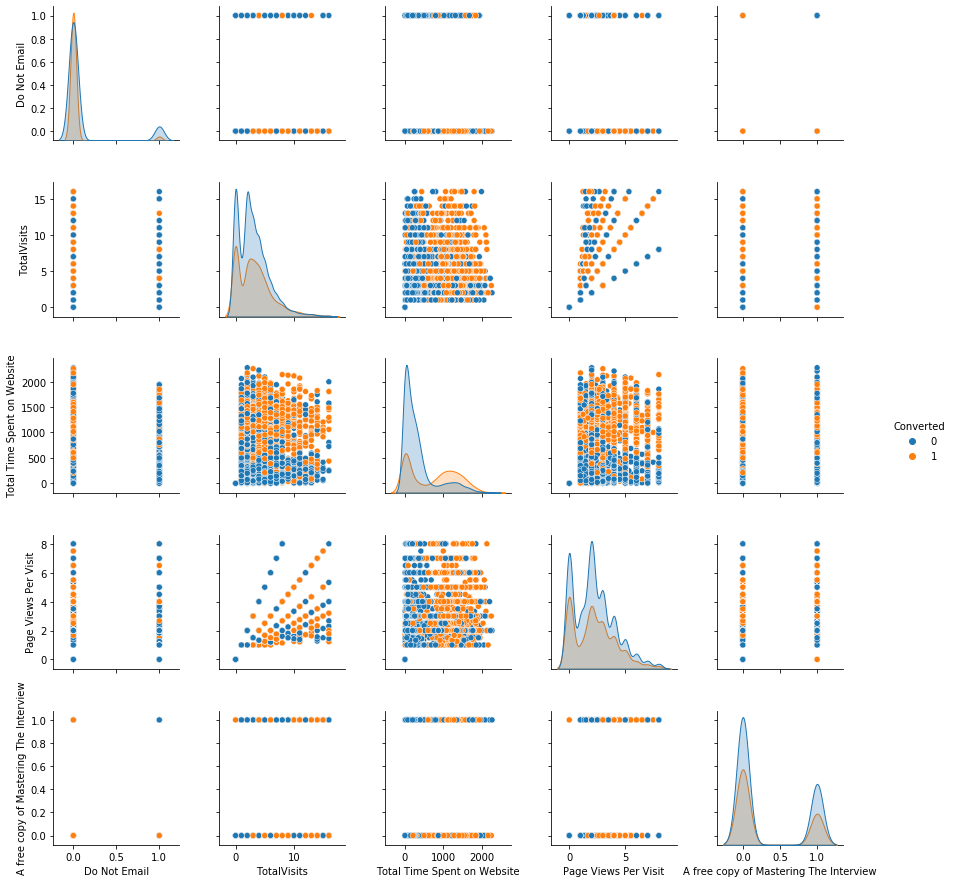

In [95]:
sns.pairplot(df1_leads,diag_kind='kde',hue='Converted')
plt.show()

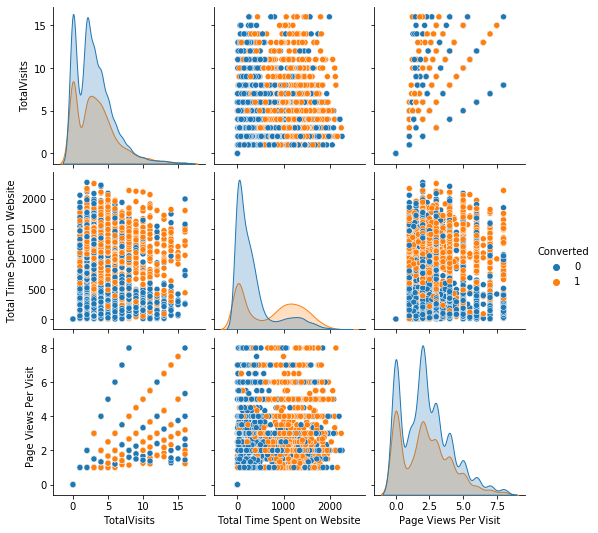

In [96]:
x_edu = df1_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

### Observing the Correlation

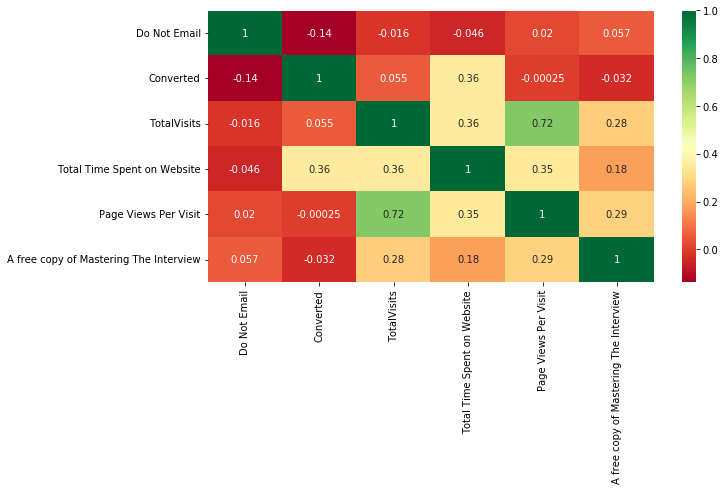

In [97]:
plt.figure(figsize=[10,5])
sns.heatmap(df1_leads.corr(), annot=True, cmap='RdYlGn', robust=True)
plt.show()

In [98]:
df1_leads = df1_leads.drop('Tags',axis=1)

## 4. Data Prepration for Modelling
    1. Dummy creation
    2. Splitting the Data into Training and Testing Sets
    3. Scaling The Features

In [99]:
df1_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8863 non-null   object 
 1   Lead Source                             8863 non-null   object 
 2   Do Not Email                            8863 non-null   int64  
 3   Converted                               8863 non-null   int64  
 4   TotalVisits                             8863 non-null   float64
 5   Total Time Spent on Website             8863 non-null   int64  
 6   Page Views Per Visit                    8863 non-null   float64
 7   Last Activity                           8863 non-null   object 
 8   Specialization                          8863 non-null   object 
 9   What is your current occupation         8863 non-null   object 
 10  City                                    8863 non-null   obje

#### 1. Dummy Creation

In [100]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_var = pd.get_dummies(df1_leads[['Lead Origin', 'What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df1_leads = pd.concat([df1_leads, dummy_var], axis=1)

In [101]:
df1_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google

In [102]:
# Dropping the original columns for which the dummy was created
df1_leads.drop(['Lead Origin', 'What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity'],axis=1, inplace=True)

In [103]:
df1_leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [104]:
df1_leads.shape

(8863, 88)

In [105]:
# Calclulating the correlation
df1_leads.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.138292,-0.016076,-0.045835,0.019535,0.056605,0.096696,-0.030365,-0.016853,-0.009220,-0.000036,0.009662,0.039034,-0.048209,0.007897,-0.004300,0.036660,-0.003619,0.045841,0.008382,0.009956,0.022634,-0.006137,0.008224,0.015226,-0.016682,0.071926,0.005542,-0.022456,0.002741,-0.010891,-0.039581,0.011332,0.022489,0.059963,0.002892,0.054625,0.107938,-0.017133,-0.068844,-0.004345,-0.003072,-0.048844,0.036998,-0.003072,0.036733,-0.035177,-0.010253,-0.004345,-0.003072,0.003687,-0.007527,-0.003072,0.010935,-0.003072,-0.003072,0.036733,-0.063087,0.631876,-0.043210,0.051951,-0.218235,-0.004345,-0.021558,-0.006933,-0.053417,0.062753,-0.003072,-0.017582,0.010192,0.264923,-0.006145,-0.003072,0.283079,-0.037358,0.051951,-0.187481,-0.003072,-0.003072,-0.011084,0.123845,-0.012061,0.036952,-0.003072,-0.028340,-0.009972,0.244252,-0.003072
Converted,-0.138292,1.000000,0.055025,0.356148,-0.000255,-0.031919,-0.037626,0.304569,-0.009385,0.040890,0.012676,-0.009938,-0.277108,0.315045,0.013015,0.027531,0.011194,0.044296,-0.006483,0.023088,-0.001246,-0.006587,0.043074,0.028351,0.007098,0.052142,0.003577,-0.006179,0.069462,0.008364,0.045119,-0.162336,-0.005770,0.010356,-0.014396,0.016025,-0.009233,-0.071871,-0.

#### 2. Splitting the Data into Training and Testing Sets

In [106]:
X = df1_leads.drop(['Converted'],axis=1)
y = df1_leads['Converted']
X.head()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [107]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [108]:
# importing the necessary library
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [110]:
X_train.shape

(6204, 87)

In [111]:
X_test.shape

(2659, 87)

### 3. Scaling The Features

In [112]:
# We will scale the features using the min max scaler
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5425,0,0.1875,0.064241,0.3750,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8586,1,0.2500,0.156334,0.5000,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4631,0,0.3125,0.160377,0.3125,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4464,0,0.1875,0.084007,0.1875,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2058,0,0.4375,0.067835,0.1750,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### The data processing done before the model is prepared is done, the Data set is now ready for model building, now we will move ahead with the model building process

## 5. Building The Model

#### We have a number of features, so to get the best features, we will use the RFE(Recursive Feature Elimination) to select the best features, we will choose the top 15 features

In [114]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [115]:
# Features Selected by RFE
rfe.support_

array([ True,  True,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('A free copy of Mastering The Interview', False, 39),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 58),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 40),
 ('What is your current occupation_Student', False, 5),
 ('What is your current occupation_Unemployed', False, 4),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 56),
 ('City_Other Cities of Maharashtra', False, 62),
 ('City_Other Metro Cities', False, 38),
 ('City_Thane & Outskirts', False, 45),
 ('City_Tier II Cities', False, 26),
 ('Specialization_Business Administration', False, 52),
 ('Specialization_E-Business', False, 23),
 ('Specialization_E-COMMERCE', False, 67),
 ('Specialization_Finance Managemen

In [117]:
# Columns selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [118]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5425,0,0.1875,0.064241,0.3750,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8586,1,0.2500,0.156334,0.5000,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4631,0,0.3125,0.160377,0.3125,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4464,0,0.1875,0.084007,0.1875,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2058,0,0.4375,0.067835,0.1750,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Model 1

In [119]:
import statsmodels.api as sm

In [120]:
# Add a Constant on X_train
# Fit a Logistic Regression Model on X-train
# Output the summary 

# Adding constant
X_train_sm = sm.add_constant(X_train[rfe_cols])

# Running the model
lom1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = lom1.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.4
Date:                Mon, 15 Jan 2024   Deviance:                       5114.7
Time:                        12:20:34   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2571      0.106    -11.873      0.000      -1.465      -1.050
Do Not Email                                            -1.6027      0.176     -9.108      0.000      -1.948      -1.258
TotalVisits                                              1.5036      0.252      5.958      0.000       1.009       1.998
Total Time Spent on Website                              4.5741      0.166     27.490      0.000       4.248       4.900
Lead Origin_Lead Add Form                                4.3919      0.236     18.575      0.000       3.929       4.855
What is your current occupation_Housewife               24.3047   2.77e+04      0.001      0.999   -5.43e+04    5.43e+04
What is your current occupation_Working Professional     2.7761      0.191     14.552      0.000       2.402       3.150
Lead Source_Olark Chat                                   1.6301      0.123     13.284      0.000       1.390       1.871
Lead Source_Welingak Website                             2.6348      1.035      2.546      0.011       0.607       4.663
Last Activity_Olark Chat Conversation                   -1.2076      0.189     -6.382      0.000      -1.578      -0.837
Last Notable Activity_Email Link Clicked                -2.0106      0.265     -7.590      0.000      -2.530      -1.491
Last Notable Activity_Email Opened                      -1.4414      0.090    -16.024      0.000      -1.618      -1.265
Last Notable Activity_Had a Phone Conversation          22.7705   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -1.8058      0.097    -18.597      0.000      -1.996      -1.615
Last Notable Activity_Olark Chat Conversation           -1.7908      0.379     -4.729      0.000      -2.533      -1.049
Last Notable Activity_Page Visited on Website           -1.9263      0.213     -9.049      0.000      -2.344      -1.509
========================================================================================================================
"""

#### -- In the above model we can see the p-values greater than 0.05, we will also check the vif, and then will drop the features one by one to see the changes


In [121]:
# importing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
# Checking the VIF for Model 1
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.61
12,Last Notable Activity_Modified,1.97
2,Total Time Spent on Website,1.93
8,Last Activity_Olark Chat Conversation,1.93
10,Last Notable Activity_Email Opened,1.69
6,Lead Source_Olark Chat,1.67
3,Lead Origin_Lead Add Form,1.49
13,Last Notable Activity_Olark Chat Conversation,1.36
7,Lead Source_Welingak Website,1.33
5,What is your current occupation_Working Profes...,1.17


#### The p-value of the column 'What is your current occupation_Housewife' is greater than 0.05, so we can drop the feature

In [123]:
# dropping column with high p-value
rfe_cols = rfe_cols.drop('What is your current occupation_Housewife',1)

### Model 2

In [124]:
# Adding constant
X_train_sm = sm.add_constant(X_train[rfe_cols])

# Running the model
lom2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = lom2.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.2
Date:                Mon, 15 Jan 2024   Deviance:                       5126.4
Time:                        12:20:34   Pearson chi2:                 6.49e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2510      0.106    -11.828      0.000      -1.458      -1.044
Do Not Email                                            -1.6043      0.176     -9.119      0.000      -1.949      -1.260
TotalVisits                                              1.4880      0.252      5.902      0.000       0.994       1.982
Total Time Spent on Website                              4.5693      0.166     27.498      0.000       4.244       4.895
Lead Origin_Lead Add Form                                4.4001      0.236     18.629      0.000       3.937       4.863
What is your current occupation_Working Professional     2.7710      0.191     14.528      0.000       2.397       3.145
Lead Source_Olark Chat                                   1.6203      0.123     13.224      0.000       1.380       1.860
Lead Source_Welingak Website                             2.6169      1.035      2.529      0.011       0.589       4.645
Last Activity_Olark Chat Conversation                   -1.2084      0.189     -6.388      0.000      -1.579      -0.838
Last Notable Activity_Email Link Clicked                -1.9941      0.263     -7.589      0.000      -2.509      -1.479
Last Notable Activity_Email Opened                      -1.4340      0.090    -15.959      0.000      -1.610      -1.258
Last Notable Activity_Had a Phone Conversation          21.7711   1.26e+04      0.002      0.999   -2.47e+04    2.48e+04
Last Notable Activity_Modified                          -1.8023      0.097    -18.575      0.000      -1.992      -1.612
Last Notable Activity_Olark Chat Conversation           -1.7858      0.378     -4.718      0.000      -2.528      -1.044
Last Notable Activity_Page Visited on Website           -1.9233      0.213     -9.039      0.000      -2.340      -1.506
========================================================================================================================
"""

In [125]:
# Checking the VIF for Model 2
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.60
11,Last Notable Activity_Modified,1.97
2,Total Time Spent on Website,1.93
7,Last Activity_Olark Chat Conversation,1.93
9,Last Notable Activity_Email Opened,1.69
5,Lead Source_Olark Chat,1.67
3,Lead Origin_Lead Add Form,1.49
12,Last Notable Activity_Olark Chat Conversation,1.36
6,Lead Source_Welingak Website,1.33
4,What is your current occupation_Working Profes...,1.17


#### Dropping the feature with high p-value, 'Last Notable Activity_Had a Phone Conversation'

In [126]:
rfe_cols = rfe_cols.drop('Last Notable Activity_Had a Phone Conversation',1)

### Model 3

In [127]:
# Adding constant
X_train_sm = sm.add_constant(X_train[rfe_cols])

# Running the model
lom3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = lom3.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.5
Date:                Mon, 15 Jan 2024   Deviance:                       5135.0
Time:                        12:20:35   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2399      0.106    -11.745      0.000      -1.447      -1.033
Do Not Email                                            -1.6126      0.176     -9.163      0.000      -1.958      -1.268
TotalVisits                                              1.5122      0.251      6.020      0.000       1.020       2.005
Total Time Spent on Website                              4.5601      0.166     27.478      0.000       4.235       4.885
Lead Origin_Lead Add Form                                4.4001      0.236     18.627      0.000       3.937       4.863
What is your current occupation_Working Professional     2.7694      0.191     14.520      0.000       2.396       3.143
Lead Source_Olark Chat                                   1.6188      0.122     13.217      0.000       1.379       1.859
Lead Source_Welingak Website                             2.6173      1.035      2.529      0.011       0.589       4.645
Last Activity_Olark Chat Conversation                   -1.2067      0.189     -6.379      0.000      -1.577      -0.836
Last Notable Activity_Email Link Clicked                -2.0074      0.263     -7.642      0.000      -2.522      -1.493
Last Notable Activity_Email Opened                      -1.4478      0.090    -16.136      0.000      -1.624      -1.272
Last Notable Activity_Modified                          -1.8148      0.097    -18.724      0.000      -2.005      -1.625
Last Notable Activity_Olark Chat Conversation           -1.7995      0.379     -4.754      0.000      -2.541      -1.058
Last Notable Activity_Page Visited on Website           -1.9406      0.213     -9.125      0.000      -2.357      -1.524
========================================================================================================================
"""

In [128]:
# Checking the VIF for Model 3
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.59
10,Last Notable Activity_Modified,1.96
2,Total Time Spent on Website,1.93
7,Last Activity_Olark Chat Conversation,1.93
9,Last Notable Activity_Email Opened,1.68
5,Lead Source_Olark Chat,1.67
3,Lead Origin_Lead Add Form,1.49
11,Last Notable Activity_Olark Chat Conversation,1.36
6,Lead Source_Welingak Website,1.33
4,What is your current occupation_Working Profes...,1.17


### Notebaly all the p-value are less the 0.05 and all the VIF values are under 4 so we can proceed further, so Model 3 is ok

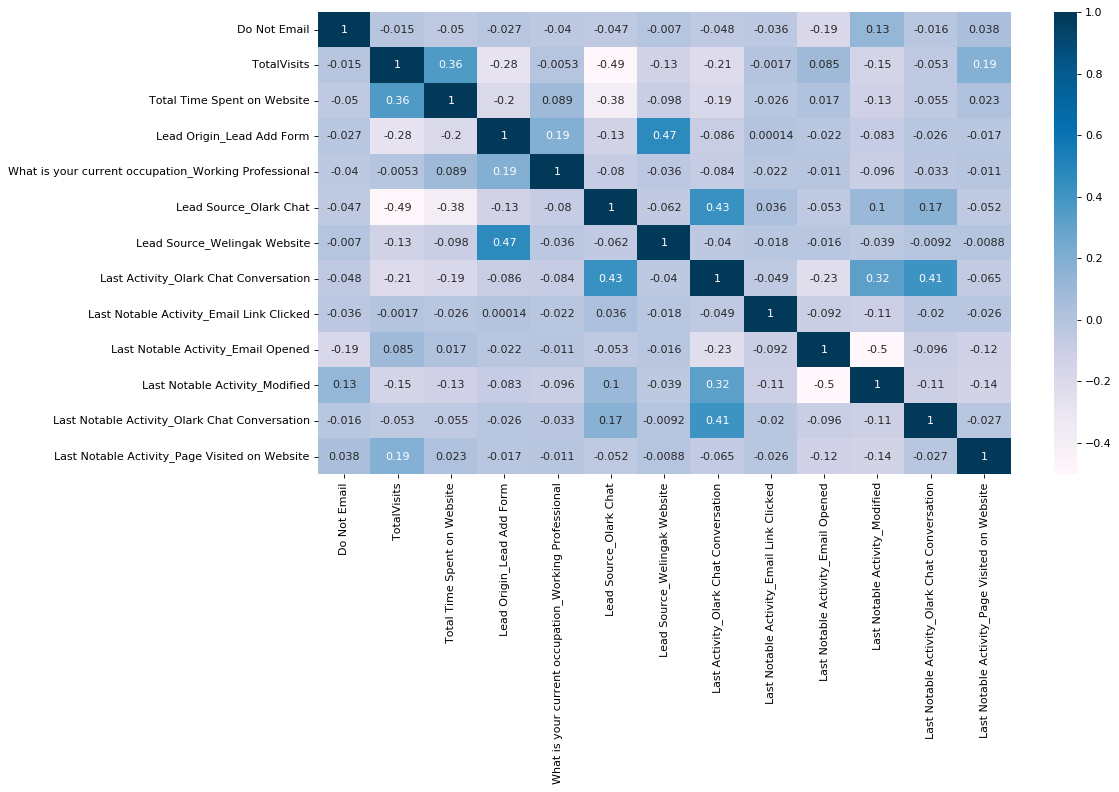

In [129]:
# Checking & Verifying & Validating Correlations Again:
plt.figure(figsize=(15,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')

corr = X_train[rfe_cols].corr()
sns.heatmap(corr, annot=True, cmap="PuBu")

plt.tight_layout()
plt.show()

### Model Prediction

In [130]:
# Predicting the probabilities (of the "Converted" value being 1) on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.89148878, 0.02721744, 0.1848703 , 0.36049297, 0.15230044,
       0.19523135, 0.81544602, 0.27902713, 0.06645045, 0.11470917])

In [131]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect Id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id
0,1,0.891489,5425
1,0,0.027217,8586
2,0,0.184870,4631
3,0,0.360493,4464
4,0,0.152300,2058


### Will create a column Predicted, if the Converted_Prob is > 0.5 will assign 1, else will assign 0

In [132]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id,Predicted
0,1,0.891489,5425,1
1,0,0.027217,8586,0
2,0,0.184870,4631,0
3,0,0.360493,4464,0
4,0,0.152300,2058,0


## 6. Model Evaluation

#### Creating Confusion Matrix

In [133]:
# importing the necessary library
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [134]:
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3421  442]
 [ 706 1635]]


In [135]:
# Checking for the overall Accuracy
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8149580915538363


#### Now Checking for Specificity and Sensitivity

In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Calculating the Sensitivity
TP/(TP+FN)

0.6984194788551901

In [138]:
# Calculating the Specificity
TN/(TN+FP)

0.8855811545431013

In [139]:
# Calculate FPR - predicting non conversion when leads have converted
print(FP/ float(TN+FP))

0.11441884545689879


In [140]:
# positive predictive value 
print (TP / float(TP+FP))

0.7871930669234473


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8289314271868186


#### Therefore the model has:
    1. Acuracy: 81.49
    2. Sensitivity: 69.84
    3. Specificity: 88.55
 
 #### No we will proceed with the ROC curve, trade off b/w the TPR and FPR. 
 
 #### True Positive Rate --> Out of actually 'converted' cases, how many is the model correctly  predicting as 'converted'
 #### False Positive Rate --> Out of actual 'non-convert' cases, how many is the model incorrectly predicting as 'converted'
 #### Thus we would want as high TPR as possible & as low FPR as possible. Ideal model would have TPR = 1 and FPR = 0.
 #### ROC Curve shows the trade-off between TPR and FPR.
 
 #### Plotting the ROC Curve

In [142]:
from sklearn import metrics

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


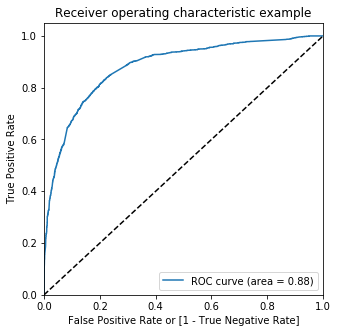

In [145]:
# Displaying the ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### The area under the curve is 0.88 which is quite good, so the model seems to be ok!

#### Finding the Optimal Cut Off

#### First we will create columns with different probabilities

#### Then we will calculate accuracy,sensitivity and specificity for various probability cutoffs.

In [146]:
# Columns with different probabilities
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.891489,5425,1,1,1,1,1,1,1,1,1,1,0
1,0,0.027217,8586,0,1,0,0,0,0,0,0,0,0,0
2,0,0.184870,4631,0,1,1,0,0,0,0,0,0,0,0
3,0,0.360493,4464,0,1,1,1,1,0,0,0,0,0,0
4,0,0.152300,2058,0,1,1,0,0,0,0,0,0,0,0


In [147]:
# Calculate accuracy,sensitivity and specificity for various probability cutoffs


cutoff_p = pd.DataFrame( columns = ['Prob','Accuracy','Sensi','Speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_p.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_p)

     Prob  Accuracy     Sensi     Speci
0.0   0.0  0.377337  1.000000  0.000000
0.1   0.1  0.601870  0.958992  0.385452
0.2   0.2  0.760316  0.903033  0.673829
0.3   0.3  0.800451  0.830842  0.782035
0.4   0.4  0.811090  0.766339  0.838209
0.5   0.5  0.814958  0.698419  0.885581
0.6   0.6  0.797872  0.580948  0.929330
0.7   0.7  0.785622  0.509184  0.953145
0.8   0.8  0.760316  0.409654  0.972819
0.9   0.9  0.716634  0.266126  0.989645


### Now we will plot the Accuracy, Sensitivity and Specificity on the graph to see the optimal point

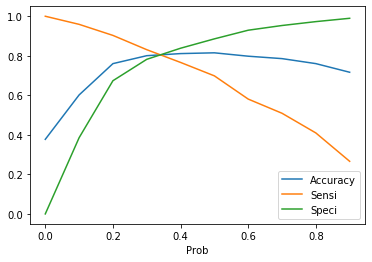

In [148]:
cutoff_p.plot.line(x='Prob', y=['Accuracy','Sensi','Speci'])
plt.show()

In [149]:
# From above the cutoff is at around 0.34

In [150]:
# Now choosing 0.34 as final cutt off lets evaluate again
y_train_pred_final['Final_Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.891489,5425,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.027217,8586,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.184870,4631,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.360493,4464,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.152300,2058,0,1,1,0,0,0,0,0,0,0,0,0


In [151]:
# Let's check the accuracy once again with the above cutoff value

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

0.804642166344294


In [152]:
# Confusion Matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3110,  753],
       [ 459, 1882]])

In [153]:
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # True Negatives
FP = confusion2[0,1] # False Positives
FN = confusion2[1,0] # False Negatives

In [154]:
# Calculating the Sensitivity
TP/(TP+FN)

0.803929944468176

In [155]:
# Calculating the Specificity
TN/(TN+FP)

0.8050737768573647

In [156]:
# false postive rate
print(FP/ float(TN+FP))

0.19492622314263525


In [157]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7142314990512334


### The cutoff seems ok

In [158]:
# Calculating the Lead Score now
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect Id','Final_Predicted','Lead_Score']].head(10)


,Converted,Converted_Prob,Prospect Id,Final_Predicted,Lead_Score
0,1,0.891489,5425,1,89
1,0,0.027217,8586,0,3
2,0,0.184870,4631,0,18
3,0,0.360493,4464,1,36
4,0,0.152300,2058,0,15
5,0,0.195231,1719,0,20
6,1,0.815446,2286,1,82
7,1,0.279027,1433,0,28
8,0,0.066450,5550,0,7
9,0,0.114709,8333,0,11


In [159]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion

array([[3110,  753],
       [ 459, 1882]])

In [160]:
# Precision:
pre= TP/ (TP + FP)
pre

0.7142314990512334

In [161]:
# Recall:
rec=TP/ (TP + FN)
rec

0.803929944468176

In [162]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final["Converted"],y_train_pred_final["Final_Predicted"]))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      3863
           1       0.71      0.80      0.76      2341

    accuracy                           0.80      6204
   macro avg       0.79      0.80      0.80      6204
weighted avg       0.81      0.80      0.81      6204



In [163]:
F1 = 2*(pre*rec)/(pre+rec)
F1

0.7564308681672026

In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
y_train_pred_final.Converted, y_train_pred_final.Final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

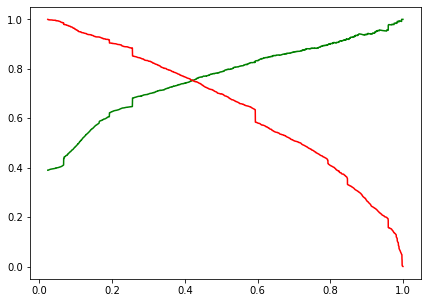

In [166]:
plt.figure(figsize=[7,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 7. Making Predictions on Test Set

In [167]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])


In [168]:
X_test = X_test[rfe_cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8788,0,0.3750,0.618598,0,0,0,0,0,0,0,0,0,0
7813,0,0.1875,0.116801,0,0,0,0,0,0,0,1,0,0
2403,0,0.8750,0.639712,0,0,0,0,0,0,0,0,0,0
7243,0,0.3125,0.509883,0,0,0,0,0,0,1,0,0,0
5363,0,0.2500,0.721473,0,0,0,0,0,0,0,0,0,0


In [169]:
print(y_test.shape)
print(X_test.shape)

(2659,)
(2659, 13)


In [170]:
#Add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [171]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8788    0.895494
7813    0.096348
2403    0.952598
7243    0.527499
5363    0.918955
3918    0.504410
3345    0.255627
917     0.142836
7732    0.087469
1702    0.105701
dtype: float64

In [172]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
8788,0.895494
7813,0.096348
2403,0.952598
7243,0.527499
5363,0.918955


In [173]:
# Converting y_test to dataframe
y_test_dataframe = pd.DataFrame(y_test)

In [174]:
y_test_dataframe['Prospect Id'] = y_test_dataframe.index

In [175]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_dataframe.reset_index(drop=True, inplace=True)

In [176]:
# Appending y_test_dataframe and y_test_pred
y_pred_final = pd.concat([y_test_dataframe, y_test_pred],axis=1)

In [177]:
# Checking the head() of the final dataframe
y_pred_final.head()

,Converted,Prospect Id,0
0,0,8788,0.895494
1,0,7813,0.096348
2,1,2403,0.952598
3,1,7243,0.527499
4,1,5363,0.918955


In [178]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [179]:
y_pred_final['Lead_Score_Board'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect Id,Converted_Prob,Lead_Score_Board
0,0,8788,0.895494,90
1,0,7813,0.096348,10
2,1,2403,0.952598,95
3,1,7243,0.527499,53
4,1,5363,0.918955,92


In [180]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Converted,Prospect Id,Converted_Prob,Lead_Score_Board,Final_Predicted
0,0,8788,0.895494,90,1
1,0,7813,0.096348,10,0
2,1,2403,0.952598,95,1
3,1,7243,0.527499,53,1
4,1,5363,0.918955,92,1


In [181]:
# Again Checking the overall Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8006769462203837

In [183]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion2

array([[1323,  326],
       [ 204,  806]])

In [184]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [187]:
# Sensitivity
TP / (TP+FN)

0.7980198019801981

In [188]:
# Specificity
TN / (TN+FP)

0.8023044269254094

In [190]:
from sklearn.metrics import precision_score, recall_score

In [192]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted)

0.7120141342756183

In [194]:
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7980198019801981

In [195]:
# False Postive Rate (predicting conversion when customer does not have convert)
print(FP/ float(TN+FP))

0.19769557307459065


In [196]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7120141342756183


In [197]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8664047151277013


In [199]:
print(classification_report(y_pred_final["Converted"],y_pred_final["Final_Predicted"]))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1649
           1       0.71      0.80      0.75      1010

    accuracy                           0.80      2659
   macro avg       0.79      0.80      0.79      2659
weighted avg       0.81      0.80      0.80      2659



In [201]:
# Precision and Recall metrics for the test set

# precision
print('Precision - ',precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

# recall
print('Recall -',recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

Precision -  0.7120141342756183
Recall - 0.7980198019801981


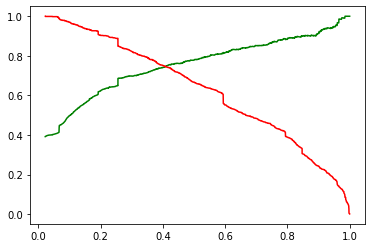

In [202]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 8. Calculating the Lead Score( As asked in the problem statement)

#### This socre needs to be assined to all the leads in the original DF, so we will have to merge the test and train

In [205]:
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Prospect Id,Converted_Prob,Lead_Score_Board,Final_Predicted
0,0,8788,0.895494,90,1
1,0,7813,0.096348,10,0
2,1,2403,0.952598,95,1
3,1,7243,0.527499,53,1
4,1,5363,0.918955,92,1


In [206]:
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_Prob,Prospect Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,1,0.891489,5425,1,1,1,1,1,1,1,1,1,1,0,1,89
1,0,0.027217,8586,0,1,0,0,0,0,0,0,0,0,0,0,3
2,0,0.184870,4631,0,1,1,0,0,0,0,0,0,0,0,0,18
3,0,0.360493,4464,0,1,1,1,1,0,0,0,0,0,0,1,36
4,0,0.152300,2058,0,1,1,0,0,0,0,0,0,0,0,0,15


In [207]:
# Selecting only the useful columns from the above train DF
leads_train_pred = leads_train_pred[['Prospect Id','Converted','Converted_Prob','Final_Predicted']]
leads_train_pred.head()

,Prospect Id,Converted,Converted_Prob,Final_Predicted
0,5425,1,0.891489,1
1,8586,0,0.027217,0
2,4631,0,0.184870,0
3,4464,0,0.360493,1
4,2058,0,0.152300,0


In [209]:
leads_test_pred = leads_test_pred[['Prospect Id','Converted','Converted_Prob','Final_Predicted']]
leads_test_pred.head()

,Prospect Id,Converted,Converted_Prob,Final_Predicted
0,8788,0,0.895494,1
1,7813,0,0.096348,0
2,2403,1,0.952598,1
3,7243,1,0.527499,1
4,5363,1,0.918955,1


In [210]:
# Concating the 2 DF's
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Prospect Id,Converted,Converted_Prob,Final_Predicted
0,5425,1,0.891489,1
1,8586,0,0.027217,0
2,4631,0,0.184870,0
3,4464,0,0.360493,1
4,2058,0,0.152300,0


In [211]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Prospect Id,Converted,Converted_Prob,Final_Predicted,Lead_Score
0,5425,1,0.891489,1,89
1,8586,0,0.027217,0,3
2,4631,0,0.184870,0,18
3,4464,0,0.360493,1,36
4,2058,0,0.152300,0,15


In [212]:
lead_full_pred.shape

(8863, 5)

In [213]:
# Making the Prospect ID column as index

lead_full_pred = lead_full_pred.set_index('Prospect Id').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_Prob,Final_Predicted,Lead_Score
Prospect Id,,,,
0,0,0.192186,0,19
1,0,0.302738,0,30
2,1,0.654719,1,65
3,0,0.088240,0,9
4,1,0.514934,1,51


In [214]:
# Determining hot leads with more than 80% Conversion Rate
hot_leads = lead_full_pred[lead_full_pred["Lead_Score"]>80]
hot_leads.head()

,Converted,Converted_Prob,Final_Predicted,Lead_Score
Prospect Id,,,,
37,1,0.846540,1,85
64,1,0.967691,1,97
76,1,0.866202,1,87
91,1,0.866519,1,87
112,1,0.980587,1,98


In [217]:
hot_leads.shape

(1488, 4)

### 9. Feature Selection

In [218]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.61
TotalVisits                                             1.51
Total Time Spent on Website                             4.56
Lead Origin_Lead Add Form                               4.40
What is your current occupation_Working Professional    2.77
Lead Source_Olark Chat                                  1.62
Lead Source_Welingak Website                            2.62
Last Activity_Olark Chat Conversation                  -1.21
Last Notable Activity_Email Link Clicked               -2.01
Last Notable Activity_Email Opened                     -1.45
Last Notable Activity_Modified                         -1.81
Last Notable Activity_Olark Chat Conversation          -1.80
Last Notable Activity_Page Visited on Website          -1.94
dtype: float64

In [219]:
# Sorting the features
b = new_params.sort_values(ascending = False)
b

Total Time Spent on Website                             4.56
Lead Origin_Lead Add Form                               4.40
What is your current occupation_Working Professional    2.77
Lead Source_Welingak Website                            2.62
Lead Source_Olark Chat                                  1.62
TotalVisits                                             1.51
Last Activity_Olark Chat Conversation                  -1.21
Last Notable Activity_Email Opened                     -1.45
Do Not Email                                           -1.61
Last Notable Activity_Olark Chat Conversation          -1.80
Last Notable Activity_Modified                         -1.81
Last Notable Activity_Page Visited on Website          -1.94
Last Notable Activity_Email Link Clicked               -2.01
dtype: float64

## '-----------------------------------------------------------'